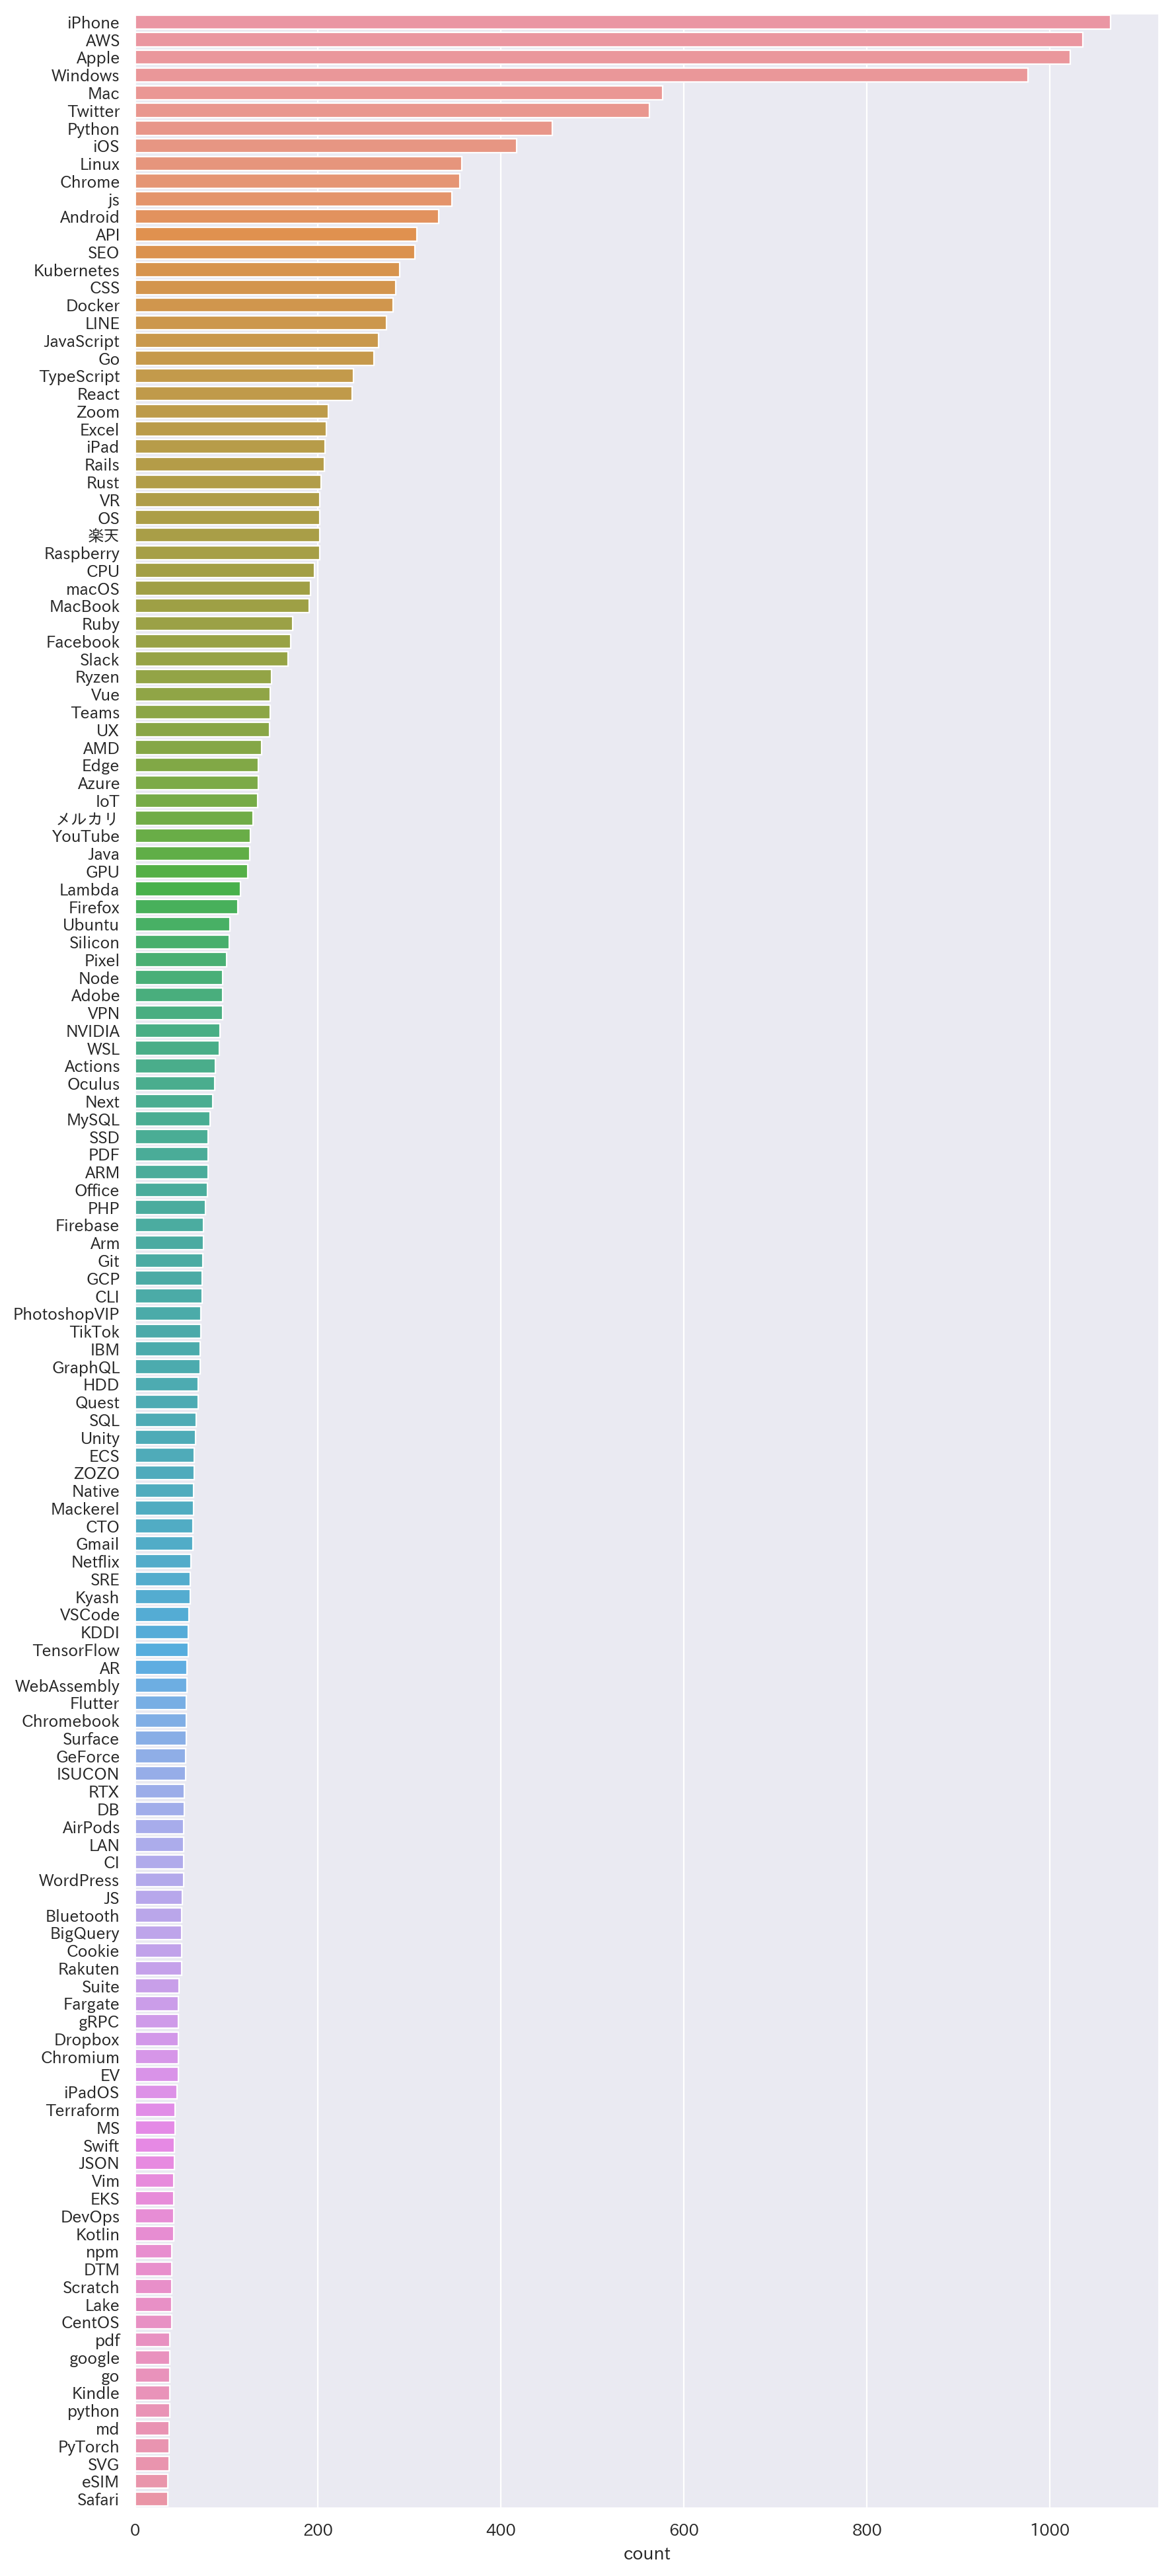

In [10]:
import MeCab
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

flatten = lambda x: [z for y in x for z in (flatten(y) if hasattr(y, '__iter__') and not isinstance(y, str) else (y,))]

data = pd.read_csv("trend-hatena-tech-2020.csv").values.tolist()
#text = "。".join(flatten(data))
flatten_data = flatten(data)

m = MeCab.Tagger ('-Ochasen')
m.parse('')

words=[]
for index,row in enumerate(flatten_data):
    node = m.parseToNode(row)
    while node:
        hinshi=node.feature.split(",")[0]
        hinshi2=node.feature.split(",")[1]
        if hinshi == "名詞" and (hinshi2 == "一般" or hinshi2 == "固有名詞"):
            words.append(node.surface)
        node = node.next

c = collections.Counter(words)
del c['*']

common_words = c.most_common(1000)

filter_condition = lambda key: key == "iPhone" or key == "AWS" or key == "Apple" or key == "Windows" or key == "Mac" or key == "Twitter" or key == "Python" or key == "iOS" or key == "Linux" or key == "Chrome" or key == "js" or key == "Android" or key == "API" or key == "SEO" or key == "Kubernetes" or key == "CSS" or key == "Docker" or key == "LINE" or key == "JavaScript" or key == "Go" or key == "TypeScript" or key == "React" or key == "Zoom" or key == "Excel" or key == "iPad" or key == "Rails" or key == "Rust" or key == "VR" or key == "OS" or key == "楽天" or key == "Raspberry" or key == "CPU" or key == "macOS" or key == "MacBook" or key == "Ruby" or key == "Facebook" or key == "Slack" or key == "Ryzen" or key == "Vue" or key == "Teams" or key == "UX" or key == "AMD" or key == "Edge" or key == "Azure" or key == "IoT" or key == "メルカリ" or key == "YouTube" or key == "Java" or key == "GPU" or key == "Lambda" or key == "Firefox" or key == "Ubuntu" or key == "Silicon" or key == "Pixel" or key == "Sim" or key == "Node" or key == "Adobe" or key == "VPN" or key == "NVIDIA" or key == "WSL" or key == "Actions" or key == "Oculus" or key == "Next" or key == "MySQL" or key == "SSD" or key == "PDF" or key == "ARM" or key == "Office" or key == "PHP" or key == "Firebase" or key == "Arm" or key == "Git" or key == "GCP" or key == "CLI" or key == "PhotoshopVIP" or key == "TikTok" or key == "IBM" or key == "GraphQL" or key == "HDD" or key == "Quest" or key == "SQL" or key == "Unity" or key == "ECS" or key == "ZOZO" or key == "Native" or key == "Mackerel" or key == "CTO" or key == "デー>タベース" or key == "Gmail" or key == "Netflix" or key == "SRE" or key == "Kyash" or key == "VSCode" or key == "KDDI" or key == "TensorFlow" or key == "AR" or key == "WebAssembly" or key == "Flutter" or key == "Chromebook" or key == "Surface" or key == "GeForce" or key == "ISUCON" or key == "RTX" or key == "DB" or key == "AirPods" or key == "LAN" or key == "CI" or key == "WordPress" or key == "JS" or key == "Bluetooth" or key == "BigQuery" or key == "Cookie" or key == "Rakuten" or key == "Suite" or key == "Fargate" or key == "gRPC" or key == "Dropbox" or key == "Chromium" or key == "EV" or key == "iPadOS" or key == "Terraform" or key == "MS" or key == "Swift" or key == "JSON" or key == "Vim" or key == "EKS" or key == "DevOps" or key == "Kotlin" or key == "npm" or key == "DTM" or key == "Scratch" or key == "Lake" or key == "CentOS" or key == "pdf" or key == "google" or key == "go" or key == "Kindle" or key == "python" or key == "md" or key == "PyTorch" or key == "SVG" or key == "eSIM" or key == "Safari"

filtered_common_words = list({key: value for key, value in dict(common_words).items() if filter_condition(key) }.items())

#start=1
#end=500
#del common_words[start-1:end]
#print(dict(common_words)['楽天'])
#print(len(filtered_common_words))

sns.set(context="paper",font="IPAexGothic")
fig = plt.subplots(figsize=(10, 25),dpi=200)

sns.countplot(y=words,order=[i[0] for i in filtered_common_words])
plt.show()